## ODE

###### Euler's Method with NumPy

In [158]:
%reset -f
import numpy as np
from math import *
dy = lambda x,y: x*y
f_analytical = lambda x: exp((x**2)/2)


x=np.linspace(0,2,10)   # it depend on the step size
n=len(x)
y=np.zeros(n)
y[0]=1

d=(x[2]-x[1])

#print(dy(x[2],y[0]))
print ('x\t\ty (Euler) \ty (analytical)') 
for i in range(1,n):
    y[i]+=y[i-1]+ dy(x[i-1],y[i-1])*d
    
    print("%f\t%f\t%f" %(x[i],y[i],f_analytical(x[i])))


x		y (Euler) 	y (analytical)
0.222222	1.000000	1.024999
0.444444	1.049383	1.103807
0.666667	1.153025	1.248849
0.888889	1.323844	1.484476
1.111111	1.585344	1.853886
1.333333	1.976787	2.432425
1.555556	2.562502	3.353071
1.777778	3.448305	4.856155
2.000000	4.810598	7.389056


###### Euler's Method, Runge-Kutta Method of Order 2 & 4

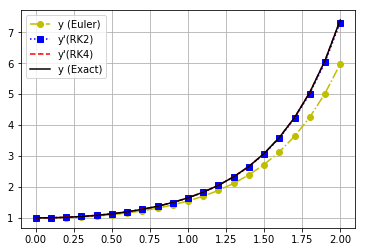

In [102]:
%reset -f
import numpy as np
from math import *
import matplotlib.pyplot as plt


# Functions defined
#-------------------
dy = lambda x,y: x*y
f = lambda x: np.exp((x**2)/2)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


#Initial Conditions for Euler's Method
#--------------------------------------
x = 0; xn = 2; h = 0.10; n = int((xn-x)/h)
y = 1 
y_euler = np.empty(n+1,float)
xp = np.linspace(x,xn,n+1)

y_euler[0] = y
#x+= h
# Euler's Lopp
# ------------
#print ('x\t\ty (Euler) \ty (analytical)') 
for i in range(1,n+1):
    y+=dy(x,y)*h
    y_euler[i]=y
    x+=h
    #print("%f\t%f\t%f" %(x,y,f_analytical(x)))

    
#print(xp[0],y_euler[0]) 
#print(xp[1],y_euler[1]) 
    
    
    
    
    

#Initial Conditions for RK_2nd Method (RESETING)
#--------------------------------------
x = 0; xn = 2; h = 0.10; n = int((xn-x)/h)
y = 1
y_rk__2=np.empty(n+1,float)
y_rk__2[0] = y
#x+= h
# Main Loop for RK-2
# -------------------
#print ('x\t\ty (RK-2nd Order) \ty (analytical)') 
for i in range(1,n+1):
    k1=dy(x,y)*h
    k2=dy(x+h/2,y+k1/2)*h
    y+=k2
    y_rk__2[i]=y
    x+=h
    #print("%f\t%f\t%f" %(x,y,f_analytical(x)))


#print(xp[0],y_rk__2[0])
#print(xp[1],y_rk__2[1])


#Initial Conditions for RK_2nd Method (RESETING)
#--------------------------------------
x = 0; xn = 2; h = 0.10; n = int((xn-x)/h)
y = 1
y_rk__4 = np.empty(n+1,float)
y_rk__4[0] = y
# Main Loop for RK-2
# -------------------
#print ('x\t\ty (RK-4th Order) \ty (analytical)') 
for i in range(1,n+1):
    k1 = dy(x,y)*h
    k2 = dy(x+h/2,y+k1/2)*h
    k3 = dy(x+h/2,y+k2/2)*h
    k4 = dy(x+h,y+k3)*h
    y += (k1 + 2*k2 + 2*k3 + k4)/6
    y_rk__4[i] = y
    x += h
    #print("%f\t%f\t%f" %(x,y,f(x)))

#print(xp[0],y_rk__4[0])
#print(xp[1],y_rk__4[1])


# Plot
plt.plot(xp, y_euler, color = 'y', marker = 'o', ls = '-.', label='y (Euler)')
plt.plot(xp, y_rk__2, color = 'b', marker = 's', ls = ':', label = 'y\'(RK2)')
plt.plot(xp, y_rk__4, color = 'r', marker = ',', ls = '--', label = 'y\'(RK4)')
plt.plot(xp, f(xp), color = 'k', lw = 1.5, ls = '-', label='y (Exact)')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

### Higher Ordered Differential Equations

###### 

31
x		 y'(RK4)	 y(RK4)		 y'(exact) 	 y(exact) 
3.141593	 2.000000	 0.000000	 2.000000	 0.000000	


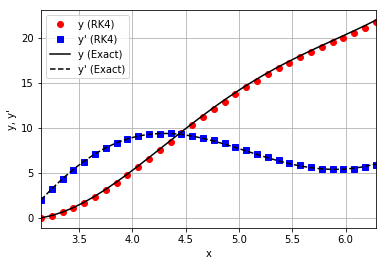

In [93]:
%reset -f
import matplotlib.pyplot as plt
import numpy as np
dy = lambda x,y,u: u
du = lambda x,y,u: 4*x + 10*np.sin(x) - y
#The analytical solution
f  = lambda x: 9*np.pi*np.cos(x) + 7*np.sin(x) + 4*x -5*x*np.cos(x)
df = lambda x: -9*np.pi*np.sin(x) + 7*np.cos(x) + 4 - 5*(np.cos(x)-x*np.sin(x))

# Initial Conditions
x = np.pi ; xn = 2*np.pi; 
y = 0
u = 2
h = 0.10
n = int((xn-x)/h)
print(n)
#ploting arrays
xp = np.linspace(x,xn,n+1);#print(xp)
yp = np.empty(n+1,float)
up = np.empty(n+1,float)
yp[0] = y
up[0] = u

#the header of the tables
print("x\t\t y\'(RK4)\t y(RK4)\t\t y\'(exact) \t y(exact) ")
print("%f\t %f\t %f\t %f\t %f\t" %(x,u,y,df(x),f(x)))
for i in range(1,n+1):
    L1 = h*du(x,y,u)
    K1 = h*dy(x,y,u)
    
    L2 = h*du(x+h/2, y+K1/2, u+L1/2)
    K2 = h*dy(x+h/2, y+K1/2, u+L1/2)
    
    L3 = h*du(x+h/2, y+K2/2, u+L2/2)
    K3 = h*dy(x+h/2, y+K2/2, u+L2/2)
    
    L4 = h*du(x+h, y+K3, u+L3)
    K4 = h*dy(x+h, y+K3, u+L3)
    
    u  +=  (L1 + 2*L2 + 2*L3 +L4)/6
    up[i] = u
    y  +=  (K1 + 2*K2 + 2*K3 +K4)/6
    yp[i] = y
    
    x+=h
    print("%f\t %f\t %f\t %f\t %f\t" %(x,u,y,df(x),f(x)))

# Plot
plt.plot(xp, yp, color = 'r', marker = 'o', ls = '', label='y (RK4)')
plt.plot(xp, up, color = 'b', marker = 's', ls = '', label='y\' (RK4)')
plt.plot(xp, f(xp), color = 'k', lw = 1.5, ls = '-', label='y (Exact)')
plt.plot(xp, df(xp), color = 'k', lw = 1.5, ls = '--', label='y\' (Exact)')
plt.xlabel('x')
plt.ylabel('y, y\'')
plt.legend(loc = 'upper left')
plt.grid()
plt.axis([np.pi, 2*np.pi, None, None])
plt.show()
